# Summary plots
- GC content in different hotspot regions

In [1]:
from plot_params import *
import pandas as pd
df=pd.read_csv(outdir / 'Mouse_annotated.csv.gz')

In [2]:
df.head()

,Unnamed: 0,transcript_id,deletion_index_start,deletion_index_end,difference,synapse_probability,start_annotation,end_annotation,subseq
0,0,ENSMUST00000000001,0,30,0.001099,0.030640,UTR5,UTR5,CACACATCCGGTTCTTCCGGGAGCTAGGGG
1,1,ENSMUST00000000001,15,45,0.001587,0.031128,UTR5,UTR5,TCCGGGAGCTAGGGGAGCTGACGGAGAAGG
2,2,ENSMUST00000000001,30,60,-0.001343,0.028198,UTR5,UTR5,AGCTGACGGAGAAGGCCACCGCCCAGCAGA
3,3,ENSMUST00000000001,45,75,-0.001099,0.028442,UTR5,UTR5,CCACCGCCCAGCAGAAGACCCGTCTCCGCC
4,4,ENSMUST00000000001,60,90,0.002197,0.031738,UTR5,UTR5,AGACCCGTCTCCGCCGGTGTGTGGCGATTC


<Axes: xlabel='start_annotation', ylabel='difference'>

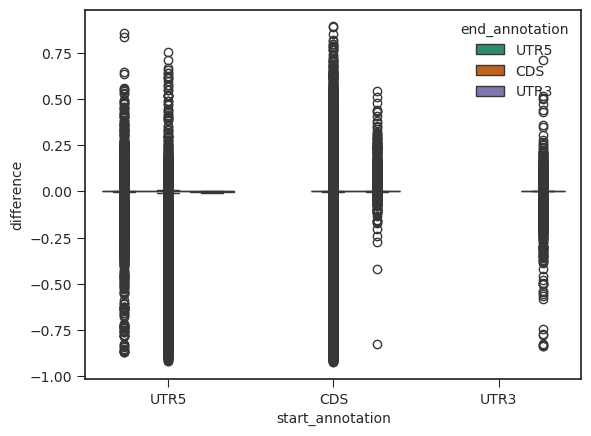

In [3]:
sns.boxplot(df, x = 'start_annotation', y = 'difference', hue = 'end_annotation')

In [4]:
df['gc_content']=df['subseq'].apply(lambda s: (s.count('C')+s.count('G'))/len(s))

<Axes: >

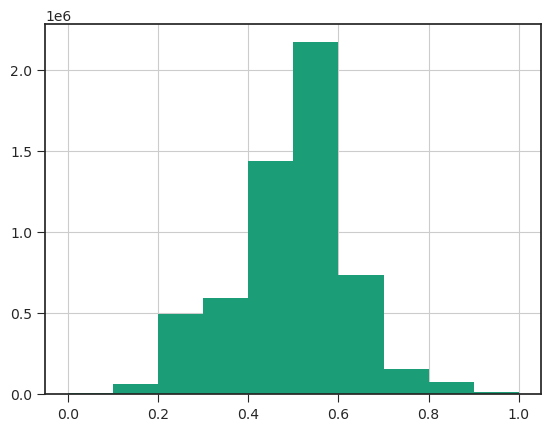

In [5]:
df['gc_content'].hist()

<Axes: xlabel='gc_content', ylabel='difference'>

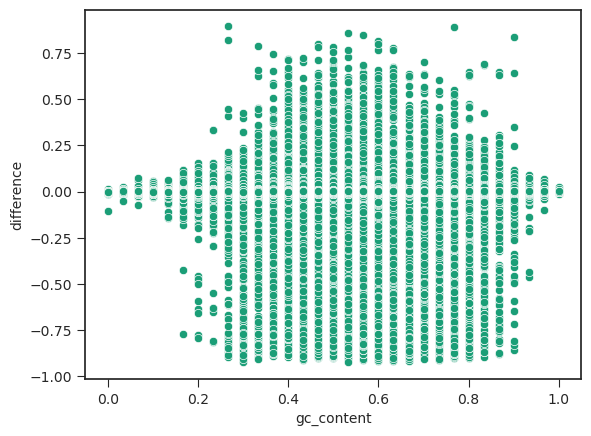

In [6]:
sns.scatterplot(df, x = 'gc_content', y = 'difference')

In [7]:
df['annotation']=df.apply(
    lambda row: 'UTR5' if row['start_annotation']=='UTR5' and row['end_annotation']=='UTR5' else
     'UTR3' if row['start_annotation']=='UTR3' and row['end_annotation']=='UTR3' else 'CDS', axis = 1)

In [8]:
df['annotation'].value_counts()

annotation
CDS     3365119
UTR3    2070849
UTR5     286862
Name: count, dtype: int64

<Axes: xlabel='annotation', ylabel='difference'>

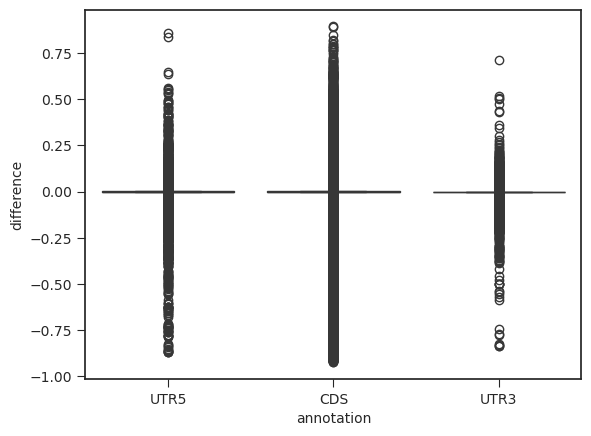

In [9]:
sns.boxplot(df, x = 'annotation', y = 'difference')

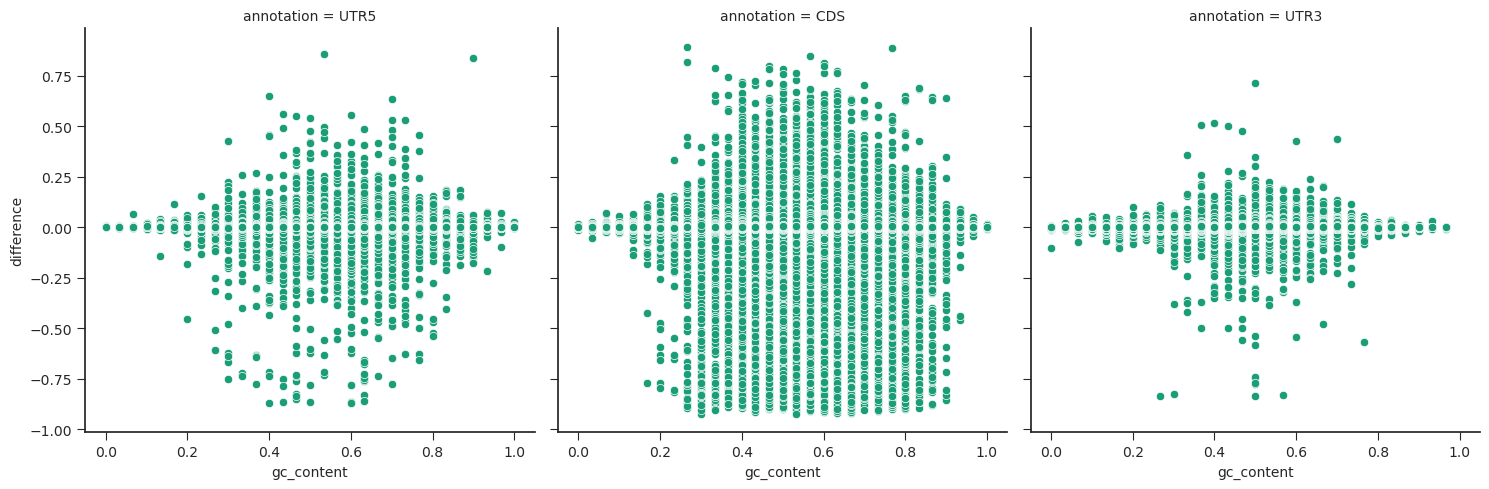

In [10]:
sns.relplot(df, x = 'gc_content', y = 'difference', col = 'annotation')